# Detecting Data Anomalies

## Forecasting potential anomalies example

### Obtaining the data
The data used for this example comes from an airline passengers dataset that is available at `https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv`. You can see additional details about this dataset at `https://www.kaggle.com/rakannimer/air-passengers`.

In [1]:
import urllib.request
import os.path

filename = "airline-passengers.csv"
if not os.path.exists(filename):
    url = "https://raw.githubusercontent.com/\
jbrownlee/Datasets/master/airline-passengers.csv"
    urllib.request.urlretrieve(url, filename)

### Viewing the Airline Passengers data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

In [3]:
apDataset = pd.read_csv('airline-passengers.csv')
passengers = apDataset['Passengers']
months = apDataset['Month']

Normally it's a __bad idea__ to supress warnings, but in this case, you can supress the FixedFormatter UserWarning if desired using the following code.

In [4]:
import warnings
warnings.filterwarnings("ignore")

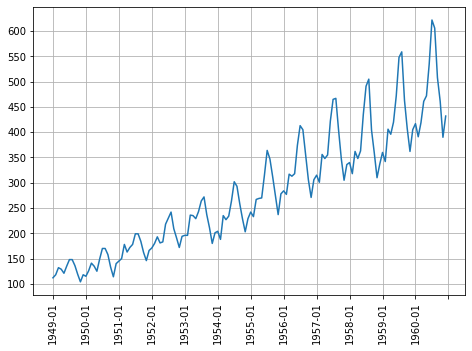

In [5]:
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, 1.0, 1.0])
ax.plot(passengers)
ticks = months[0::12]
ticks = pd.concat([pd.Series([' ']), ticks])
ax.xaxis.set_major_locator(ticker.MultipleLocator(12))
ax.set_xticklabels(ticks, rotation='vertical')
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(100, end, 50))
ax.grid()
plt.show()

### Show autocorrelation and partial autocorrelation

In [6]:
from statsmodels.graphics import tsaplots

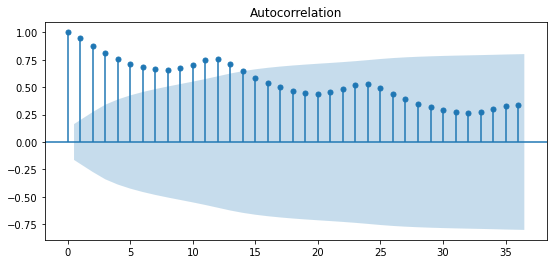

In [7]:
fig = tsaplots.plot_acf(passengers, lags=36)
fig.set_size_inches(9, 4, 96)
plt.show()

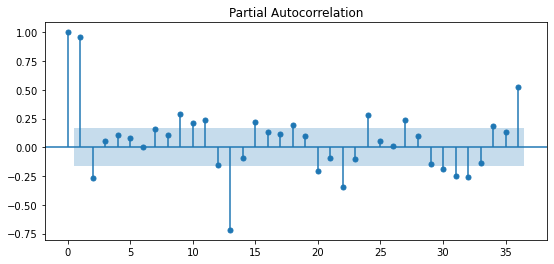

In [8]:
fig = tsaplots.plot_pacf(passengers, lags=36)
fig.set_size_inches(9, 4, 96)
plt.show()

### Making a prediction

#### Create the train and test sets

In [9]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

In [10]:
series = pd.read_csv('airline-passengers.csv', 
                     header=0, index_col=0, 
                     parse_dates=True, squeeze=True)
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
print("Training Set: ", train)
print("Testing Set: ", test)

Training Set:  [118 132 129 121 135 148 148 136 119 104 118 115 126 141 135 125 149 170
 170 158 133 114 140 145 150 178 163 172 178 199 199 184 162 146 166 171
 180 193 181 183 218 230 242 209 191 172 194 196 196 236 235 229 243 264
 272 237 211 180 201 204 188 235 227 234 264 302 293 259 229 203 229 242
 233 267 269 270 315 364 347 312 274 237 278 284 277 317 313 318 374 413
 405 355 306 271 306 315 301 356 348 355 422 465 467 404 347 305 336 340
 318 362 348 363 435 491 505 404 359 310 337 360 342 406 396 420 472 548
 559 463 407 362 405 417 391 419 461 472]
Testing Set:  [535 622 606 508 461 390 432]


#### Building a model

In [11]:
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

Coefficients: [ 4.40999915  0.54377634  0.31837725 -0.02344532 -0.09328385  0.23085169
 -0.15420365  0.09373805 -0.09291185  0.32015708 -0.46668114  0.05145669
  0.73075956 -0.25128548 -0.33381625  0.242229   -0.15796594 -0.09420813
 -0.08006763  0.05655165 -0.06648343 -0.14659542  0.29515085  0.24214347
  0.09150113 -0.02924769 -0.36689735 -0.01890586  0.12110732  0.0568705 ]


#### Making a prediction

In [12]:
predictions = model_fit.predict(start=len(train),
                                end=len(train)+len(test)-1,
                                dynamic=False)
for i in range(len(predictions)):
        print('predicted=%f, expected=%f' 
              % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=552.536526, expected=535.000000
predicted=632.633224, expected=622.000000
predicted=629.130658, expected=606.000000
predicted=527.457734, expected=508.000000
predicted=432.252914, expected=461.000000
predicted=399.961090, expected=390.000000
predicted=424.926456, expected=432.000000
Test RMSE: 18.165


#### Plotting the result

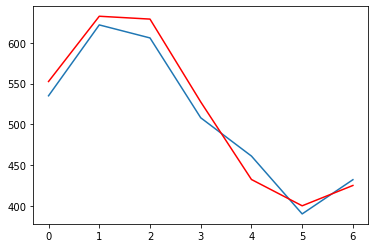

In [13]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()